In [ ]:
!unzip /content/gdrive/MyDrive/Research/kvasir-seg.zip

In [34]:
!rm -rf /content/Kvasir-SEG


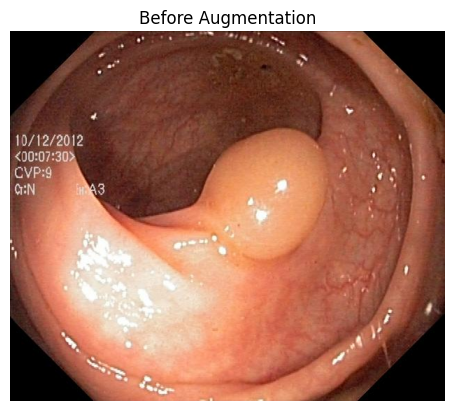

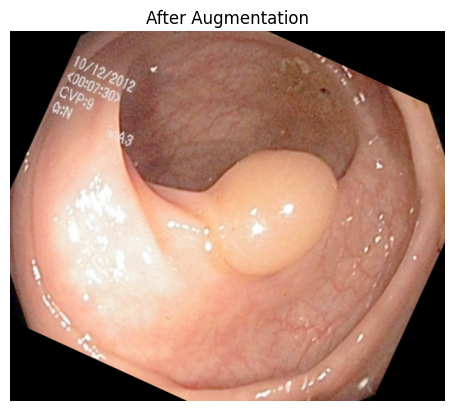

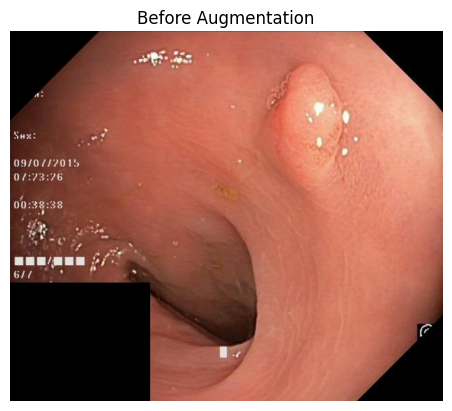

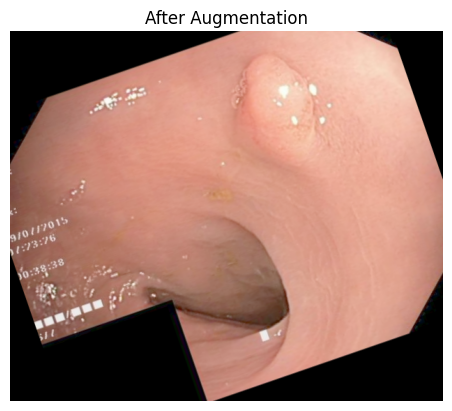

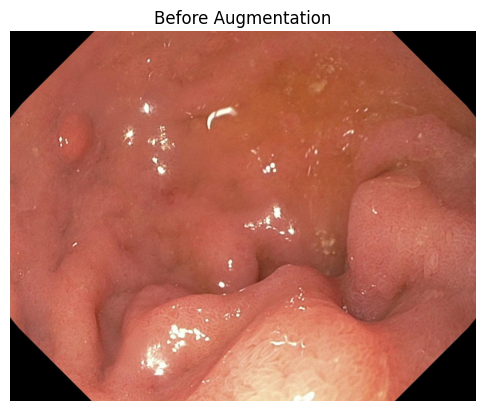

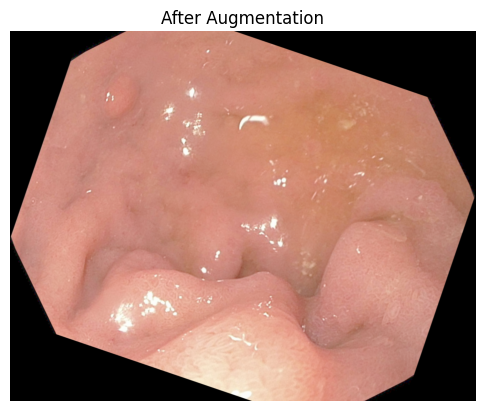

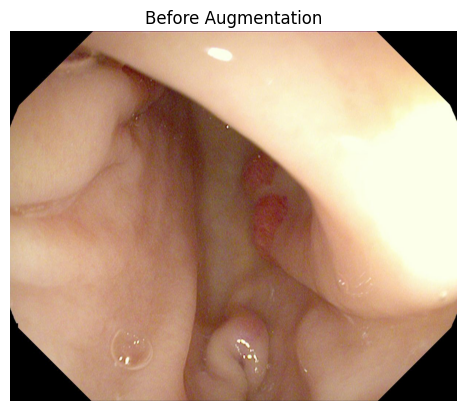

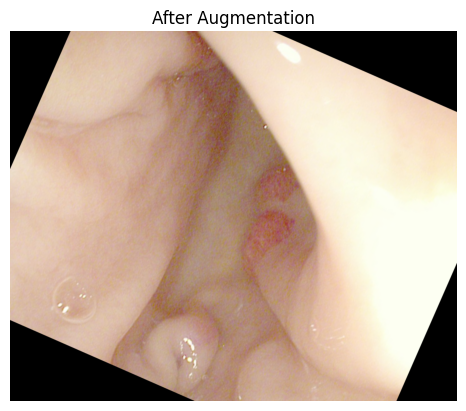

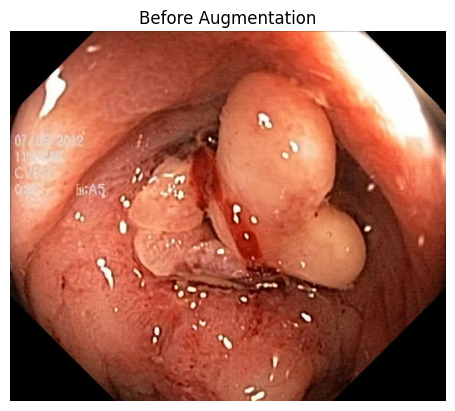

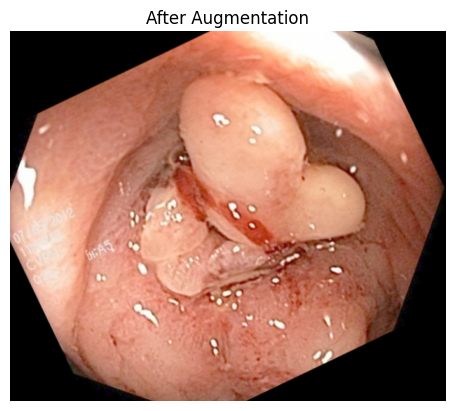

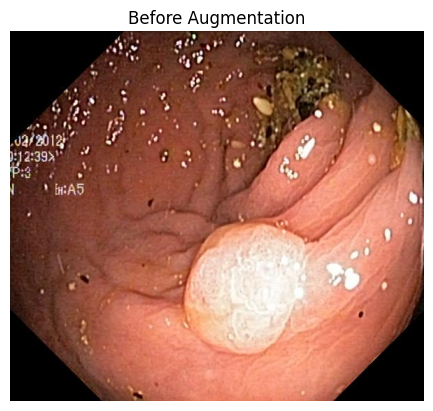

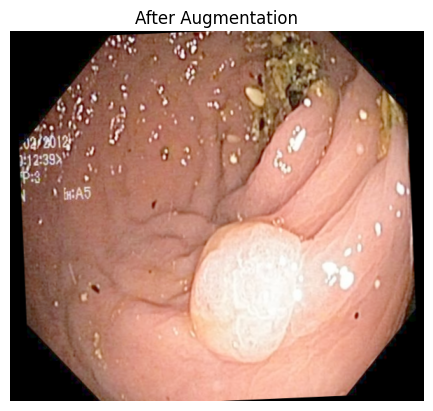

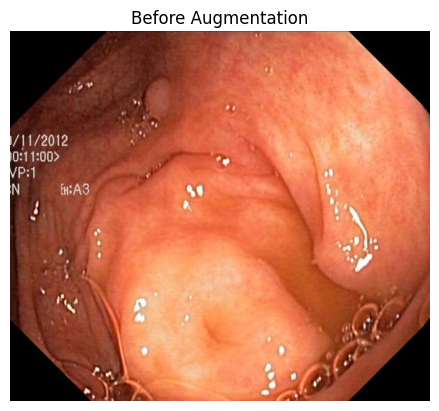

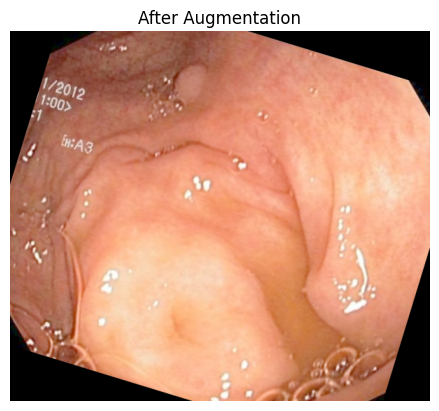

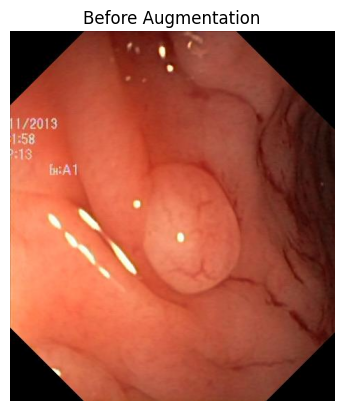

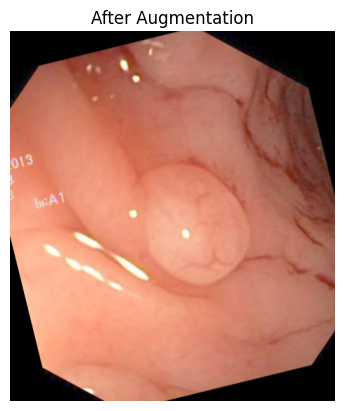

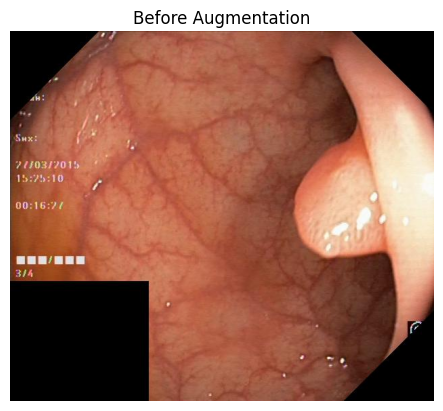

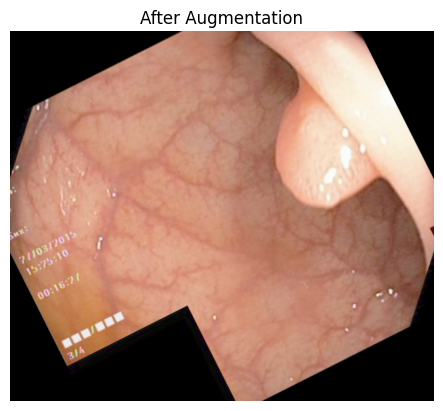

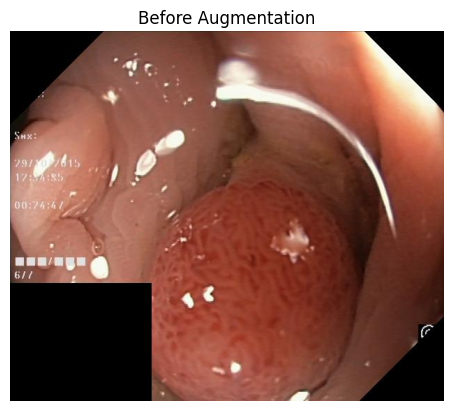

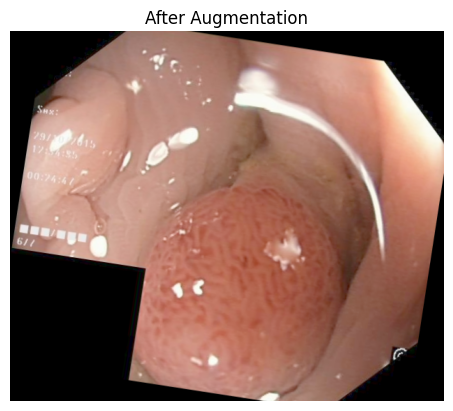

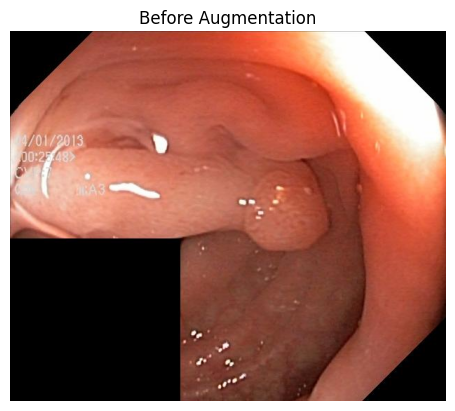

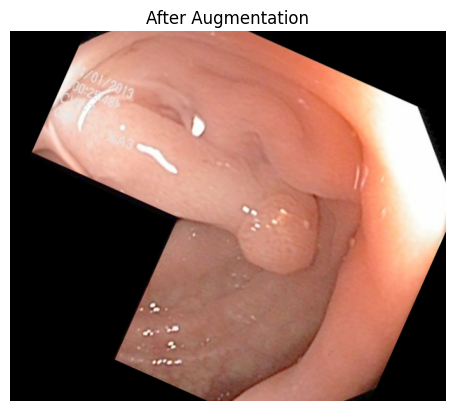

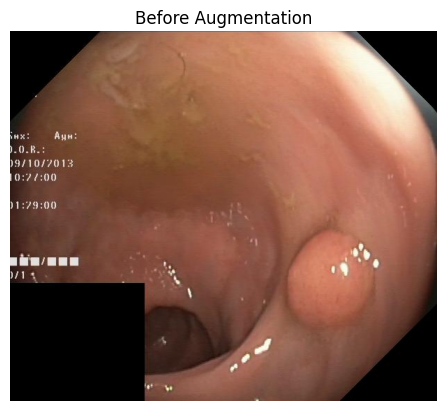

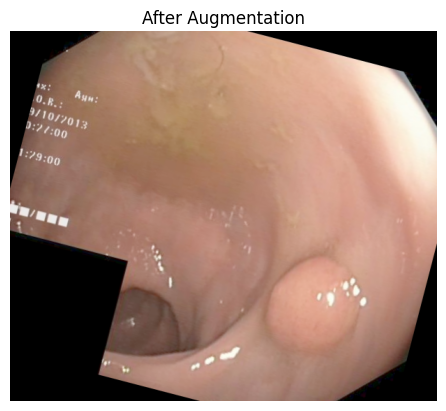

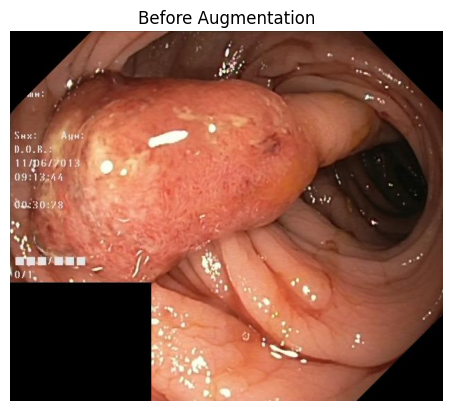

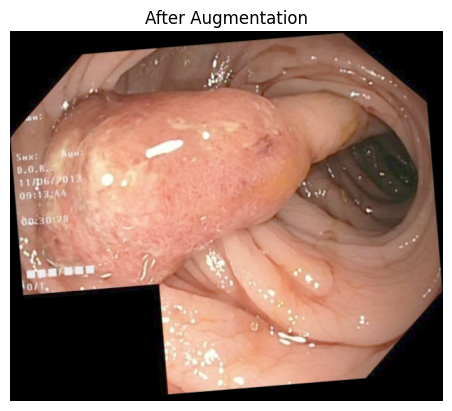

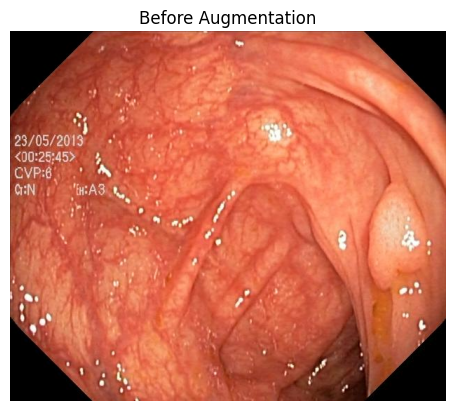

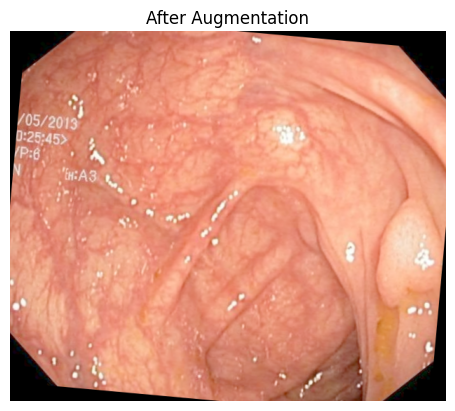

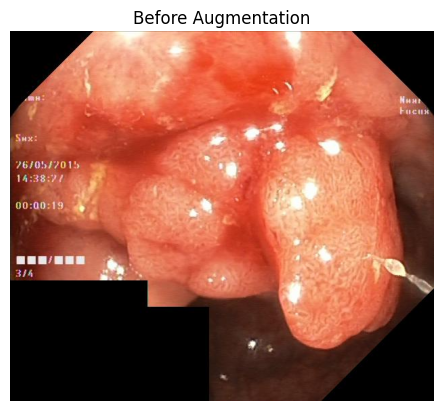

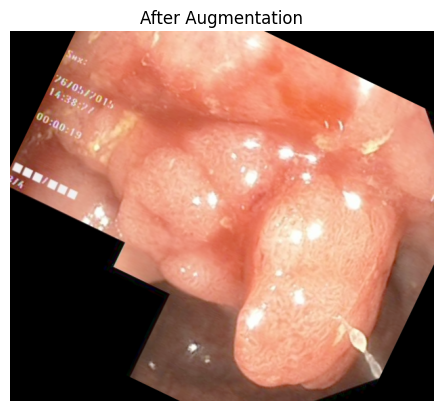

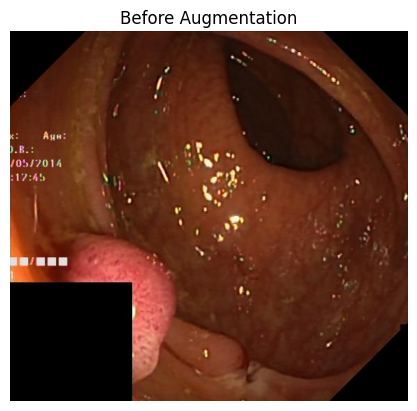

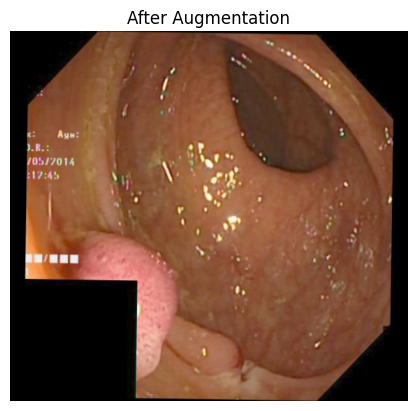

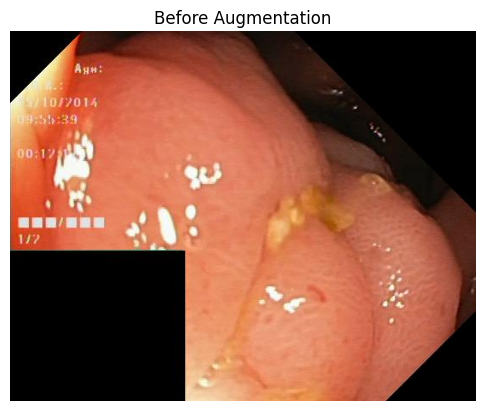

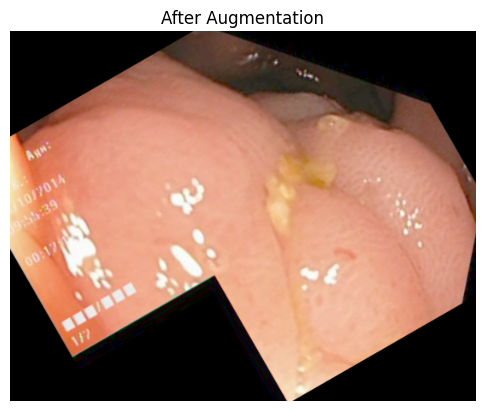

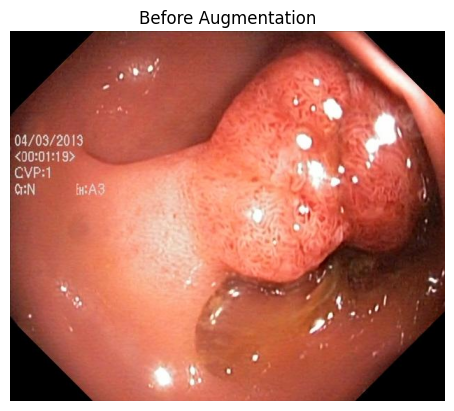

In [ ]:
from PIL import Image
import os
import numpy as np
from random import randint
import matplotlib.pyplot as plt

from imgaug import augmenters as iaa

# Define augmentation parameters
size_augmentation = iaa.Affine(scale={"x": (0.9, 1.1), "y": (0.9, 1.1)})
contrast_augmentation = iaa.GammaContrast(gamma=(0.6, 0.6))
rotation_augmentation = iaa.Affine(rotate=(-30, 30))

# Define the path to the dataset
dataset_path = '/content/Kvasir-SEG'

# Function to augment and save images
def augment_and_save_image(image_path, save_path):
    # Load the image
    pil_img = Image.open(image_path)
    np_image = np.array(pil_img)

    # Display before augmentation
    plt.axis('off')
    plt.imshow(pil_img)
    plt.title('Before Augmentation')
    plt.show()

    # Apply size augmentation
    augmented_img = size_augmentation.augment_image(np_image)

    # Apply contrast augmentation
    augmented_img = contrast_augmentation.augment_image(augmented_img)

    # Apply rotation augmentation
    augmented_img = rotation_augmentation.augment_image(augmented_img)

    # Convert augmented image back to PIL format
    augmented_img_pil = Image.fromarray(augmented_img.astype('uint8'))

    # Display after augmentation
    plt.axis('off')
    plt.imshow(augmented_img_pil)
    plt.title('After Augmentation')
    plt.show()

    # Save augmented image
    augmented_img_pil.save(save_path)

# Augment images and masks
for folder in ['images', 'masks']:
    sub_path = os.path.join(dataset_path, folder)
    save_sub_path = os.path.join(dataset_path, f'augmented_{folder}')
    os.makedirs(save_sub_path, exist_ok=True)
    for img_name in os.listdir(sub_path):
        img_path = os.path.join(sub_path, img_name)
        save_img_path = os.path.join(save_sub_path, img_name)
        augment_and_save_image(img_path, save_img_path)


## **Import packages and images**

Mounted at /content/gdrive


## **Plot accuracy before Transfer Learning**

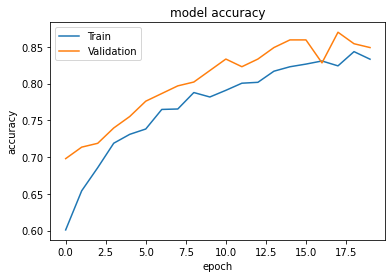

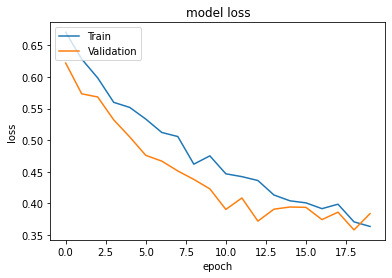

In [ ]:
plot_acc_loss(history)

In [ ]:
test_loss, test_acc = model.evaluate(test_set, steps=test_set.samples // BATCH_SIZE)
print(f"Test Accuracy before fine tuning: {test_acc*100:.2f} %")

6/6 [==============================] - 1s 175ms/step - loss: 0.4150 - acc: 0.7917
Test Accuracy before fine tuning: 79.17 %


## **Fine-tune hyperparameters to optimize performance**

In [ ]:
vgg_19.trainable = True

set_trainable = False
for layer in vgg_19.layers:
    if layer.name=='block5_conv1':
        set_trainable = True
    if set_trainable == True:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
model.compile(
  loss = 'categorical_crossentropy',
  optimizer = optimizers.Adam(lr=2e-5),
  metrics = ['acc']
)

In [ ]:
history = model.fit(
  training_set,
  steps_per_epoch = training_set.samples // BATCH_SIZE,
  epochs = NUM_EPOCHS,
  validation_data = val_set,
  validation_steps = val_set.samples // BATCH_SIZE,
  shuffle = True
  )

Epoch 1/20
52/52 [==============================] - 14s 232ms/step - loss: 0.3893 - acc: 0.8162 - val_loss: 0.3281 - val_acc: 0.8490
Epoch 2/20
52/52 [==============================] - 12s 224ms/step - loss: 0.3336 - acc: 0.8537 - val_loss: 0.3419 - val_acc: 0.8698
Epoch 3/20
52/52 [==============================] - 12s 225ms/step - loss: 0.2756 - acc: 0.8833 - val_loss: 0.3174 - val_acc: 0.8542
Epoch 4/20
52/52 [==============================] - 12s 225ms/step - loss: 0.2373 - acc: 0.8984 - val_loss: 0.3270 - val_acc: 0.8646
Epoch 5/20
52/52 [==============================] - 12s 225ms/step - loss: 0.1998 - acc: 0.9129 - val_loss: 0.4254 - val_acc: 0.8333
Epoch 6/20
52/52 [==============================] - 12s 225ms/step - loss: 0.2028 - acc: 0.9196 - val_loss: 0.4031 - val_acc: 0.8698
Epoch 7/20
52/52 [==============================] - 12s 225ms/step - loss: 0.1680 - acc: 0.9389 - val_loss: 0.4767 - val_acc: 0.8385
Epoch 8/20
52/52 [==============================] - 12s 227ms/step - 

## **Plot accuracy after Transfer Learning**

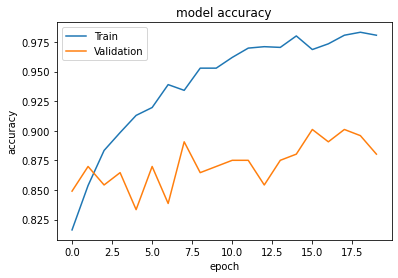

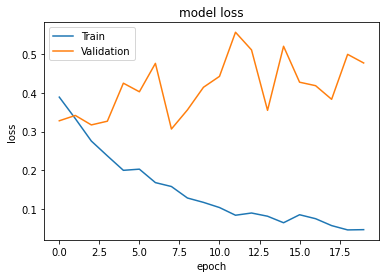

In [ ]:
plot_acc_loss(history)

In [ ]:
test_loss, test_acc = model.evaluate(test_set, steps=test_set.samples // BATCH_SIZE)
print(f"Test Accuracy After fine tuning: {test_acc*100:.2f} %")

6/6 [==============================] - 1s 171ms/step - loss: 1.1520 - acc: 0.8021
Test Accuracy After fine tuning: 80.21 %
